<h1><center>SIFT</center></h1>
<h2><center>Universidad Nacional de Colombia</center></h2>
<h2><center>Técnicas de inteligencia artificial</center></h2>
<h2><center>Camilo Esteban Zambrano Pereira</center></h2>

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# SIFT (Scale-Invariant Feature Transform)
---

Algunos algoritmos de detección de caracteristicas pierden precisión al aplicarse sobre imagenes escaladas, por ejemplo el de detección de esquinas puede detectartar algunos puntos en la imagen inicial y otros diferentes en la imagen escalada. SIFT es un algoritmo que permite mantener constantes las caracteristicas detectados a pesar d modificaciones en la imagen como el escalado o la rotación.

SIFT utiliza la diferencia de gaussianas con diferentes valores de $\sigma$, donde los valores pequeños se encargan de de caracteristicas pequeñas y los valores grandes evidencian caracteristicas más grandes. Esto se logra realizando la resta entre filtros adyacentes como se observa en la imágen:
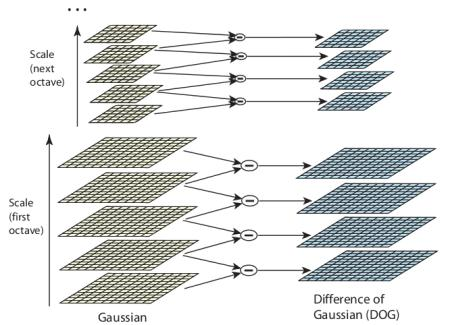

Posteriormente se buscan puntos que prevalezcan en diferentes escalas que representan potenciales caracteristicas.
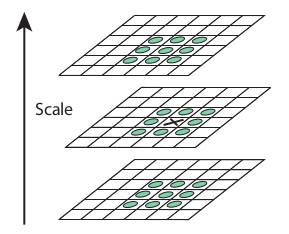

# Aplicación
---

Text(0.5, 1.0, 'Cancer')

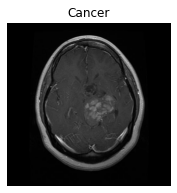

In [79]:
# Imágen original
cancer = cv2.imread("fig/Cancer (1).jpg", 0)
plt.imshow(cancer, cmap="gray")
plt.axis("off")
plt.title("Cancer")

(-0.5, 124.5, 149.5, -0.5)

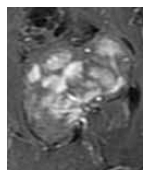

In [80]:
# Tumor de la imagen
tumor = cancer[200:350, 225:350]
plt.imshow(tumor, cmap="gray")
plt.axis("off")

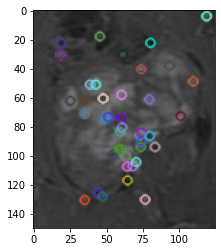

In [30]:
# Implementación de SIFT
sift = cv2.SIFT_create()
kp = sift.detect(tumor,None)
img=cv2.drawKeypoints(tumor,kp,cancer)
plt.imshow(img)

# Ejemplo de uso
---

Encontrar imágen dentro de otra:

(-0.5, 1023.5, 511.5, -0.5)

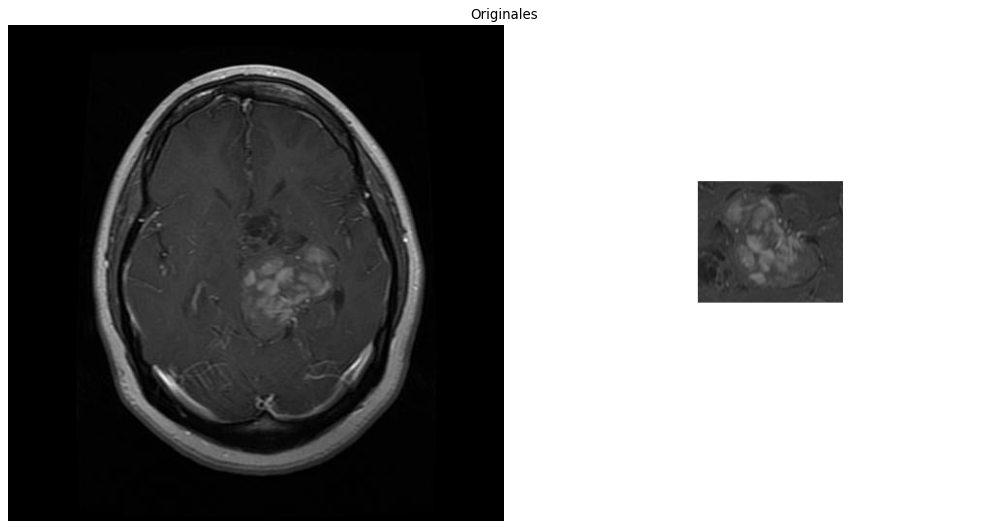

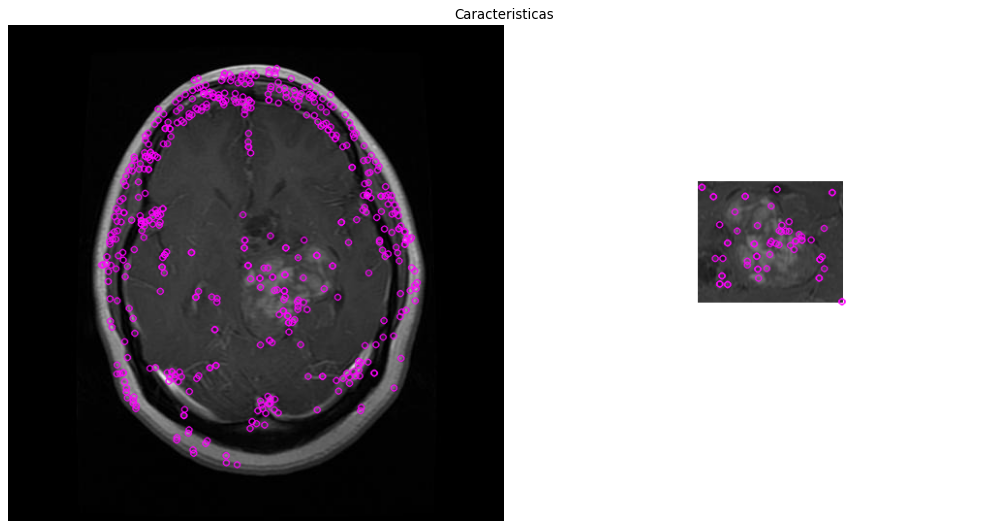

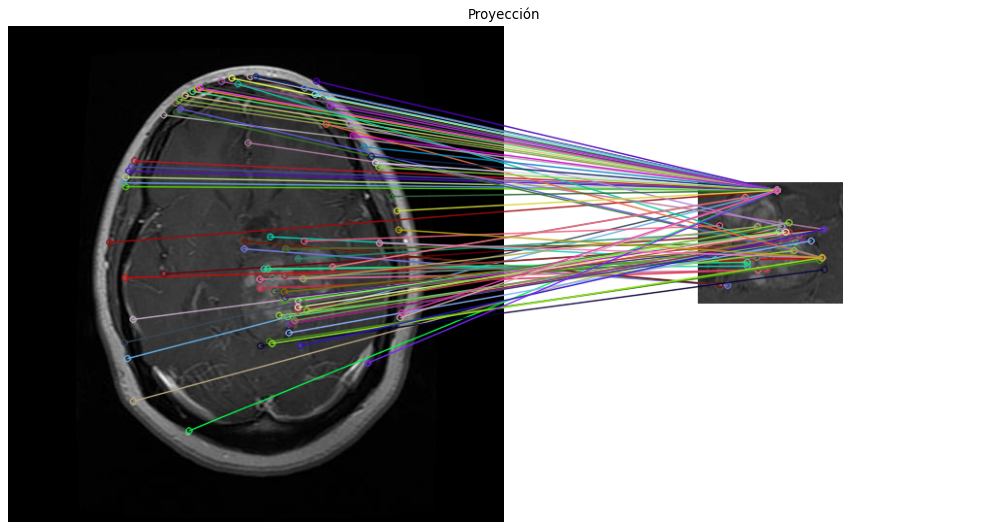

In [82]:
# Se crea el objeto SIFT
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(cancer,None)

# Se crea una imagen del tumor más grande, con fondo blanco y rotada
img2 = np.ones((cancer.shape), "uint8")*255
img2[200:350, 225:350] =  tumor
img2 = cv2.rotate(img2, cv2.cv2.ROTATE_90_COUNTERCLOCKWISE)

# Detección de caracteristicas 
kp2, des2 = sift.detectAndCompute(img2,None) 

# Imagenes originales
hmerge = np.hstack((cancer, img2))
plt.figure(figsize=(16, 9), dpi=80)
plt.imshow(hmerge, cmap="gray")
plt.title("Originales")
plt.axis("off")

# Se dibujan las caracteristicas de cada imágen
img3 = cv2.drawKeypoints(cancer,kp1,cancer,color=(255,0,255))
img4 = cv2.drawKeypoints(img2,kp2,img2,color=(255,0,255))

# Imágenes con las caracteristicas
hmerge = np.hstack((img3, img4))
plt.figure(figsize=(16, 9), dpi=80)
plt.imshow(hmerge, cmap="gray")
plt.title("Caracteristicas")
plt.axis("off")


# Match entre las imágenes
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

# Proyección
img5 = cv2.drawMatchesKnn(cancer, kp1, img2, kp2, good, None, flags = 2)
plt.figure(figsize=(16, 9), dpi=80)
plt.imshow(img5, cmap="gray")
plt.title("Proyección")
plt.axis("off")

# Conclusiones
---

* Se observa que SIFT es un algoritmo muy util para encontrar imágenes dentro de otras, que pueden tener diferentes orienteaciones o tamaños, esto es una herramienta util al momento de segmentar imágenes.
* Para el proyecto no es una tecnica muy util, puesto que cada tumor posee tamaños, formas, intensidades y demás caracteristicas muy variadas donde SIFT no será suficiente, en caso de que se quisiera segmentar los tumores seguramente sería mucho más eficientes tecnicas como autoencoders.